In [6]:
import os
import pandas as pd
import json
import pickle
from collections import defaultdict
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

import torch

import os, sys
parentPath = os.path.abspath("..")
if parentPath not in sys.path:
    sys.path.insert(0, parentPath)
    
from src.data import prepare_data, load_source, slice_d

## 学習者によらない正解率を出す

In [12]:
data = load_source('Asteria_Eng_ver5')

correct_count = defaultdict(int)
wrong_count = defaultdict(int)

for seq in data:
    for x in seq:
        if x[1] == 1:
            correct_count[x[0]] += 1
        else:
            wrong_count[x[0]] += 1

correctness = []
for sid in correct_count.keys():
    print('{:.2f} ({}/{})'.format(correct_count[sid] / (correct_count[sid]+wrong_count[sid]), correct_count[sid], correct_count[sid]+wrong_count[sid]))
    correctness.append(correct_count[sid] / (correct_count[sid]+wrong_count[sid]))
    

0.94 (11839/12552)
0.77 (9019/11766)
0.85 (6217/7311)
0.60 (6356/10510)
0.78 (2551/3268)
0.69 (3681/5345)
0.75 (3625/4857)
0.67 (2280/3416)
0.64 (3051/4798)
0.75 (1766/2356)
0.75 (11495/15252)
0.73 (8575/11785)
0.72 (9517/13267)
0.81 (6198/7676)
0.72 (1036/1439)
0.73 (7558/10414)
0.79 (5025/6397)
0.71 (6680/9345)
0.88 (539/614)
0.89 (599/676)
0.90 (369/411)
0.64 (5862/9105)
0.70 (5861/8315)
0.67 (7472/11218)
0.69 (6238/8984)
0.67 (2541/3789)
0.64 (2168/3390)
0.77 (1340/1746)
0.78 (83/106)
0.85 (60/71)
0.86 (49/57)
0.94 (49/52)
0.80 (51/64)
0.64 (1403/2179)
0.65 (1589/2440)
0.81 (214/264)
0.57 (2439/4269)
0.57 (2957/5189)
0.73 (1091/1497)
0.74 (943/1281)
0.63 (8314/13109)
0.69 (7516/10842)
0.69 (4080/5910)
0.79 (9437/11944)
0.61 (3284/5368)
0.60 (5312/8850)
0.67 (3678/5484)
0.75 (458/612)
0.73 (2349/3204)
0.82 (1735/2114)
0.68 (3859/5642)
0.57 (3070/5344)
0.75 (1086/1444)
0.82 (1362/1663)
0.74 (1503/2033)
0.77 (2566/3315)
0.69 (2778/3998)
0.70 (1919/2733)
0.74 (974/1325)
0.81 (4974/6151

Over 0.80: 28.2%(92/326)


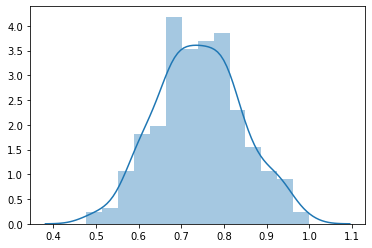

In [15]:
# correctness = np.array(correctness) 
over_080 = len([c for c in correctness if c > 0.8])
print('Over 0.80: {:.1f}%({}/{})'.format(over_080/len(correctness)*100, over_080, len(correctness)))
sns.distplot(correctness)